# Augmentation

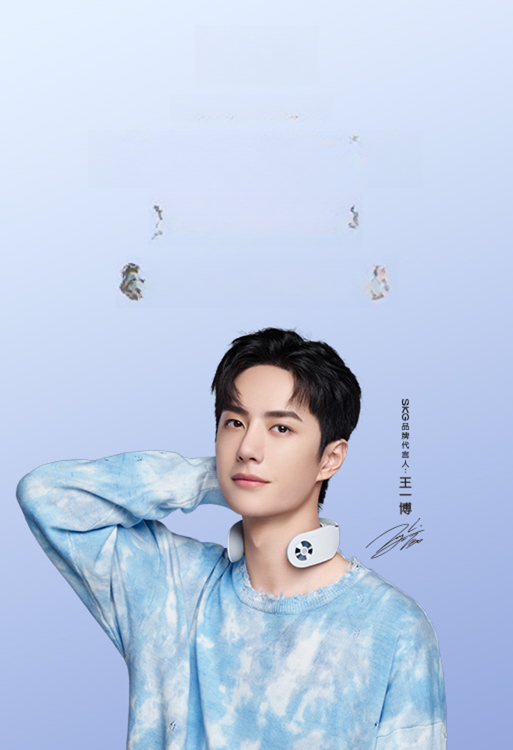

In [25]:
from PIL import Image
import os
path = "data/cgl_dataset/augment_cgl"
li = sorted(os.listdir(path))
sample_path = li[500] # 인덱스 , 4

Image.open(os.path.join(path,sample_path))

In [ ]:
import torch
import numpy as np
from PIL import Image
import json
import requests
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from transformers import DPTImageProcessor, DPTForDepthEstimation,DPTFeatureExtractor

import torch
from torchvision import transforms

from diffusers import ControlNetModel, StableDiffusionXLControlNetImg2ImgPipeline, AutoencoderKL
from diffusers.utils import load_image

from torchvision import transforms
import os
import copy

def get_depth_map(image):
    image = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)
    with torch.no_grad(), torch.autocast("cuda"):
        depth_map = depth_estimator(image).predicted_depth

    depth_map = torch.nn.functional.interpolate(
        depth_map.unsqueeze(1),
        size=(1024, 1024),
        mode="bicubic",
        align_corners=False,
    )
    depth_min = torch.amin(depth_map, dim=[1, 2, 3], keepdim=True)
    depth_max = torch.amax(depth_map, dim=[1, 2, 3], keepdim=True)
    depth_map = (depth_map - depth_min) / (depth_max - depth_min)
    image = torch.cat([depth_map] * 3, dim=1)
    image = image.permute(0, 2, 3, 1).cpu().numpy()[0]
    image = Image.fromarray((image * 255.0).clip(0, 255).astype(np.uint8))
    return image

device = "cuda" if torch.cuda.is_available() else "cpu"
img_path = "data/PKU_PosterLayout/train/inpainted_poster"

# Depth estimation
depth_estimator = DPTForDepthEstimation.from_pretrained("Intel/dpt-hybrid-midas").to(device)
feature_extractor = DPTFeatureExtractor.from_pretrained("Intel/dpt-hybrid-midas")

orig_image = Image.open(os.path.join(img_path,'O1CN011h2Oqe1iNFNjZjeB4_!!2200676434400-0-alimamazszw.png'))#
size = orig_image.size
orig_image = orig_image.resize((1024,1024))
depth_image = get_depth_map(orig_image)
depth_image



# Layout Pair

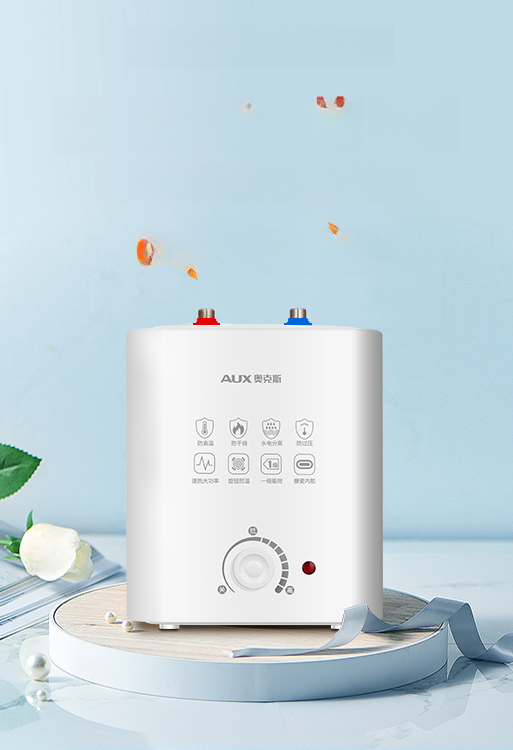

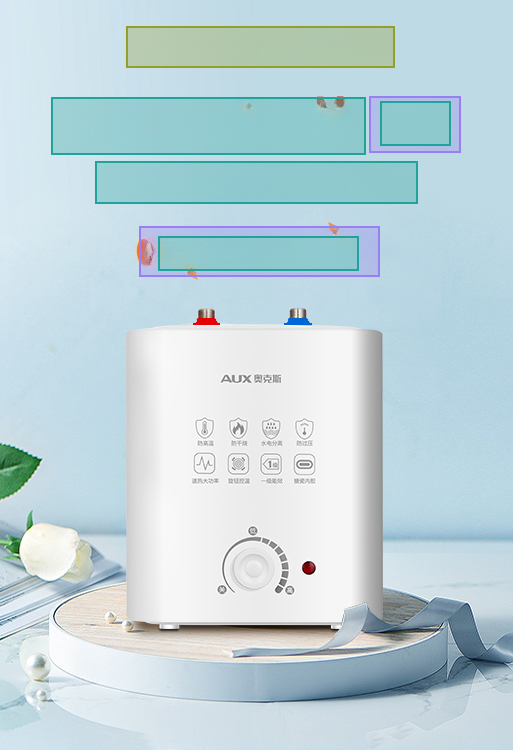

In [26]:
from PIL import Image
import os
import json
img_path = "data/cgl_dataset/cgl_inpainting_all"

layout_img_path = "log_dir/Paper_samples/Real_data"
text_order = "log_dir/train_stage2_with_augment_dino_codellama_text/generated_sample/12/text_order.json"
with open(text_order,"r") as f:
    order = json.load(f) 
sample_path = order[300] # 인덱스

display(Image.open(os.path.join(img_path,sample_path)))
display(Image.open(os.path.join(layout_img_path,sample_path)))